## API

Today, we'll continue with the dictionaries lecture from last week.
one of the most popular forms of python dictionaries you'll run across as you work is __JSON__ ([JavaScript Object Notation](https://www.json.org/json-en.html)). JSON is the primary format in which data is passed back and forth to APIs ([Application Programming Interface](https://medium.com/@perrysetgo/what-exactly-is-an-api-69f36968a41f)), and most API servers will send their responses in JSON format. Python has great JSON support, with the json package. 

[General list of APIs]('https://github.com/public-apis/public-apis')

#### Simple Example

In [1]:
# import requests and json - needed to make an API call
import requests
import json

In [5]:
# this is the api endpoint to get a JSON 
# https://api.chucknorris.io/ 
joke_api_url = 'https://api.chucknorris.io/jokes/random'

In [6]:
# calling the API with requests
response = requests.get(joke_api_url)
# creating a variable called data to hold the json formatted result
joke_data = response.json()

In [7]:
#print type of response - dict within a dict 
print(type(joke_data))

<class 'dict'>


In [8]:
#json response with joke 
joke_data

{'categories': [],
 'created_at': '2020-01-05 13:42:20.568859',
 'icon_url': 'https://assets.chucknorris.host/img/avatar/chuck-norris.png',
 'id': 'HLAaUplyQvSFVouNs6UiDg',
 'updated_at': '2020-01-05 13:42:20.568859',
 'url': 'https://api.chucknorris.io/jokes/HLAaUplyQvSFVouNs6UiDg',
 'value': "Chuck Norris doesn't even need to put the seat up when he urinates."}

In [10]:
# just print 
print(joke_data['value'])

Chuck Norris doesn't even need to put the seat up when he urinates.


In [17]:
# in a function 

import requests

def get_joke():
  """fetches and prints a random joke"""
  url = "https://api.chucknorris.io/jokes/random"
  resp = requests.get(url)
#   resp.encoding = "utf-8"
  data = resp.json()
  print(data["value"])

get_joke()

when Chuck norris was 3 years old he snacked on a box of crayons, 2 weeks ago he reportedly shit out a candle, and when i came out, it was lit!


#### NYT Example

In [18]:
# import requests and json - needed to make an API call
import requests
import json

# import getpass to keep API key hidden 
import getpass

In [54]:
authorized_key = getpass.getpass('API Key:')

API Key:········


TO DO - if you want to play around with the API, please make your own key at https://developer.nytimes.com/get-started






In [36]:
# API url for the most emailed articles over a day, past 7 days or 30 days
# we are getting the results for the past 7 days
#need to pass in a string because you cannot concat string + int 
day = str(7) # this particular API requires you to choose from 1, 7, 30 (past day, 7 days, 30 days)
api_url = "https://api.nytimes.com/svc/mostpopular/v2/emailed/{}.json?api-key={}".format(day, authorized_key)

#print to check 
#print(api_url)



In [37]:
# calling the API with requests
response = requests.get(api_url)
# creating a variable called data to hold the json formatted result
data = response.json()

In [38]:
# show raw data
print(type(data))
data

<class 'dict'>


{'status': 'OK',
 'copyright': 'Copyright (c) 2023 The New York Times Company.  All Rights Reserved.',
 'num_results': 20,
 'results': [{'uri': 'nyt://article/4a14eedf-eec6-5720-8c12-1fe365de7715',
   'url': 'https://www.nytimes.com/2023/02/17/well/move/pelvic-floor-exercise-kegels.html',
   'id': 100000008594278,
   'asset_id': 100000008594278,
   'source': 'New York Times',
   'published_date': '2023-02-17',
   'updated': '2023-02-22 09:52:01',
   'section': 'Well',
   'subsection': 'Move',
   'nytdsection': 'well',
   'adx_keywords': 'Content Type: Service;Muscles;Exercise;Pregnancy and Childbirth;Pelvis;Hips;Women and Girls',
   'column': None,
   'byline': 'By Danielle Friedman',
   'type': 'Article',
   'title': 'Every Woman Can Benefit From This Pelvic Floor Workout',
   'abstract': 'It’s time to show these overlooked muscles more love.',
   'des_facet': ['Content Type: Service',
    'Muscles',
    'Exercise',
    'Pregnancy and Childbirth',
    'Pelvis',
    'Hips',
    'Women 

In [49]:
# all the information is stored in the key, 'results'
# results maps to a list of dictionaries that contain the article metadata
# so you will need to use an index number to access the dictionary you want
# the API is constantly updated so you may get different results each time you access it
article = data['results'][2]
article

{'uri': 'nyt://article/736903e5-0865-5b47-be4a-481909a1562e',
 'url': 'https://www.nytimes.com/2023/02/25/well/mind/rem-sleep-benefits.html',
 'id': 100000008771422,
 'asset_id': 100000008771422,
 'source': 'New York Times',
 'published_date': '2023-02-25',
 'updated': '2023-02-27 06:55:55',
 'section': 'Well',
 'subsection': 'Mind',
 'nytdsection': 'well',
 'adx_keywords': 'Sleep;Brain;Parasomnias (Sleep Disorders);Research;Content Type: Service;internal-sub-only',
 'column': None,
 'byline': 'By Carolyn Todd',
 'type': 'Article',
 'title': 'REM Sleep Is Magical. Here’s What the Experts Know.',
 'abstract': 'Dreaming, memory-making, problem-solving: A lot happens during the most active sleep phase',
 'des_facet': ['Sleep',
  'Brain',
  'Parasomnias (Sleep Disorders)',
  'Research',
  'Content Type: Service',
  'internal-sub-only'],
 'org_facet': [],
 'per_facet': [],
 'geo_facet': [],
 'media': [{'type': 'image',
   'subtype': 'photo',
   'caption': '',
   'copyright': 'Ana Galvañ',
 

In [50]:
# get url
article['url']

'https://www.nytimes.com/2023/02/25/well/mind/rem-sleep-benefits.html'

In [51]:
# get title
article['title']

'REM Sleep Is Magical. Here’s What the Experts Know.'

In [52]:
# get byline
article['byline']

'By Carolyn Todd'

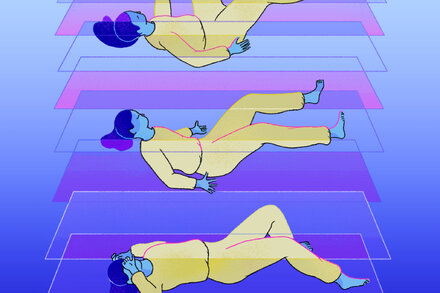

In [53]:
# use IPython & the media metadata to display an image from the returned data
# IPython (Interactive Python) is basically a command shell for interactive computing
# here we are using it to import the display module and Image class so we can see our image within our notebook
from IPython.display import Image

# Image takes three arguments: the image path/url, width, and height
# we are going to fetch all of those data from above like we did for article url, title, and byline
media_meta = article['media'][0]['media-metadata'][2] # this is the same as: data['results'][4]['media'][0]['media-metadata'][2]
url = media_meta['url'] # data['results'][4]['media'][0]['media-metadata'][2]['url']
width = media_meta['width'] # data['results'][4]['media'][0]['media-metadata'][2]['width']
height = media_meta['height'] # data['results'][4]['media'][0]['media-metadata'][2]['height']
Image(url, width=width, height=height) # plug in the correct variables in order